In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

1. Из библиотеки scikit-learn подгрузите данные.

In [66]:
from sklearn.datasets import load_iris
df = load_iris(as_frame=True).frame
features = df.drop(['target'], axis=1)

2. Сформируйте новое поле target_virginica, которое будет равно из 0, если цветок не является классом 2, иначе  — 1. Убедитесь, что разметка выполнена корректно, рассчитав количество объектов каждого класса по новой целевой переменной target_virginica.

In [67]:
target_virginica = []
for tr in df['target']:
    if(tr != 2):
        target_virginica += [0]
    else:
        target_virginica += [1]
print(len(df.target))
print(len(target_virginica))

150
150


3. Обучите библиотечную модель логистической регрессии на обучающей части данных.

In [68]:
#Разделяем датасет на тренировочную и валидационную части
features_train, features_test, target_virginica_train, target_virginica_test = train_test_split(features, target_virginica, test_size=0.3, random_state=45)
print(df.target)
#Обучаем модель логистической регрессии
modelLogisticRegression = LogisticRegression()
modelLogisticRegression.fit(features_train, target_virginica_train)
#Предсказываем значения целевой переменной на основе тестовой выборки
predictions_val = modelLogisticRegression.predict(features_test)


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


4. Оцените качество обученной на предыдущем шаге модели, выведя матрицу ошибок для прогнозов обученной моделью на тестовой части данных.

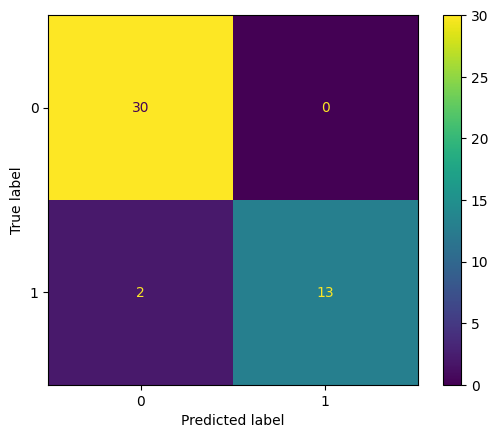

In [69]:
ConfusionMatrixDisplay(confusion_matrix(target_virginica_test, predictions_val)).plot()

In [70]:
#Для оценки качества модели определим F1-меру
from sklearn.metrics import f1_score
f1_score(target_virginica_test, predictions_val)

0.9285714285714286

<b> ВЫВОД:
Ввиду того, что количество TP и TN гораздо больше количества FP и FN, следует вывод что обученная модель достаточно высокого качества. В этом нам также позволяет убедиться и метрика F1 = 0.92.</b>

5. Сконструируйте свой класс MyLogisticRegression, решающий задачу логистической регрессии методом градиентного спуска.

    a) Он должен инициализироваться величиной шага градиентного спуска и количеством итераций градиентного спуска.

    b) Должен содержать метод fit для обучения модели, на вход которой будут подаваться обучающие данные. Чтобы реализовать функцию sigmoid, можно воспользоваться библиотечной функцией np.exp. Для расчета градиента необходимо использовать формулу, приведенную в курсе в блоке «Логистическая регрессия для решения задачи бинарной классификации».

    c) Должен содержаться метод predict, который будет возвращать лейбл 0/1. Лейбл должен рассчитываться из вероятности принадлежности классу 1. Вероятность должна рассчитываться как сигмоида от результата произведения матрицы фичей X и вектора весов модели w.

In [71]:
class MyLogisticRegression:
    def __init__(self, step_size, iterations):
        self.step_size = step_size
        self.iterations = iterations
        self.weights = None
    
    def fit(self, train_features, train_target):
        train_features = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        #Определяем веса случайным
        self.weights = np.random.rand(train_features.shape[1])
        
        for i in range(self.iterations):
            y_pred = self.sigmoid(np.dot(train_features, self.weights))
            gradient = np.dot(train_features.T, y_pred - train_target)
            self.weights -= self.step_size * gradient

    def predict(self, test_features):
        test_features = np.concatenate((np.ones((test_features.shape[0], 1)), test_features), axis=1)
        val_p = self.sigmoid(np.dot(test_features, self.weights))
        label = np.where(val_p >= 0.5, 1, 0)
        return label
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

6. Обучите модель с помощью реализованного класса с произвольными параметрами градиентного спуска.

In [72]:
my_modelLogisticRegression = MyLogisticRegression(0.9, 1000)
my_modelLogisticRegression.fit(features_train, target_virginica_train)

C:\Users\STELS\AppData\Local\Temp\ipykernel_2916\3091339042.py:23: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


7. Оцените качество модели, обученной с помощью класса MyLogisticRegression, выведя матрицу ошибок для прогнозов обученной моделью на тестовой части данных.
8. Подберите такие параметры градиентного спуска, чтобы разделение получилось не хуже, чем у библиотечной модели.

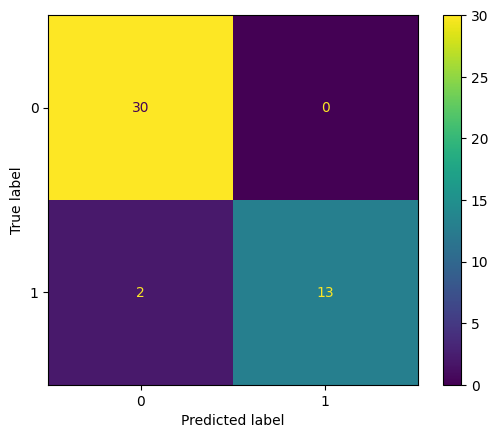

In [73]:
#Предсказываем значения целевой переменной на основе тестовой выборки
predict_val_my_modelLogReg = modelLogisticRegression.predict(features_test)
ConfusionMatrixDisplay(confusion_matrix(target_virginica_test, predict_val_my_modelLogReg)).plot()

In [74]:
f1_score(target_virginica_test, predict_val_my_modelLogReg)

0.9285714285714286

<b>ВЫВОД:
Модель разработанного нами класса MyLogisticRegression дает точно такой же результат, что и модель стандартного класса LogisticRegression</b>